In [1]:
import pickle, random, copy, platform, os, time
import numpy as np
import tensorflow as tf

In [2]:
def read_data():
    with open('resnet_data', 'rb') as f:
        data = pickle.load(f)
        Xtr = data[0]
        Xtr = np.reshape(Xtr, (-1,75,75,2))
        Ytr = data[1]
        Xte =data[2]
        Xte = np.reshape(Xte, (-1,75,75,2))
        rf =data[3]
    return Xtr, Ytr, Xte, rf

In [3]:
75*75*2

11250

In [4]:
from sklearn.decomposition import PCA

train_img, _, test_img, _ =read_data()
tr_mat = train_img.reshape(-1, 11250)
te_mat = test_img.reshape(-1, 11250)

#Running PCA retaining 95% of the variance 
pca_digits=PCA(1152) #1152 = 24*24*2
tr_proj = pca_digits.fit_transform(tr_mat) 
print (tr_mat.shape, tr_proj.shape)
print (np.sum(pca_digits.explained_variance_ratio_))

(1604, 11250) (1604, 1152)
0.968651426201


In [15]:
#test data
pca_digits1=PCA(1152) #1152 = 24*24*2
te_proj = pca_digits1.fit_transform(te_mat) 

(1604, 11250) (1604, 1152)
0.968651426201


In [16]:
print (te_mat.shape, te_proj.shape)
print (np.sum(pca_digits1.explained_variance_ratio_))

(8424, 11250) (8424, 1152)
0.880687497161


In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt 

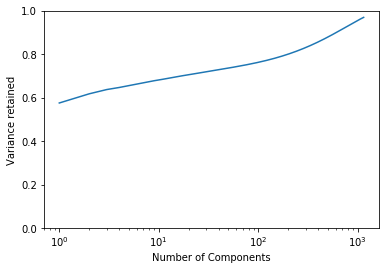

In [7]:
plt.semilogx(np.cumsum(pca_digits.explained_variance_ratio_)) 
plt.xlabel('Number of Components') 
plt.ylabel('Variance retained') 
plt.ylim(0,1) 
plt.show()

In [10]:
#reconstruct the images using the new reduced dataset
#64x64 pixel images into 8x8 images. 
#Now to visualize how these images look we need to inverse transform the 8x8 images 
#back to 64x64 dimension. Note that we're not reverting back to the original data, we're simply going back to the 
#actual dimension of the original images so we can visualize them.

tr_inv_proj = pca_digits.inverse_transform(tr_proj)  
#reshaping as 400 images of 64x64 dimension 
tr_proj_img = np.reshape(tr_inv_proj,(-1,75,75,2)) 
tr_proj_img.shape

(1604, 75, 75, 2)

In [17]:
te_inv_proj = pca_digits1.inverse_transform(te_proj)  
#reshaping as 400 images of 64x64 dimension 
te_proj_img = np.reshape(te_inv_proj,(-1,75,75,2)) 
te_proj_img.shape

(8424, 75, 75, 2)